## Analyzing Top 5 Players Stats based on MVP's throughout the years 

Are MVP Winners changing over time, or do certain players consistently appear at the top?

Which player has had the most MVP's throughout the years? Which team?

Why has this player made mvp compared to the other 4 players?

Does the MVP winner have a better or worst team?

In [447]:
import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt

In [448]:
df = pd.read_csv("/Users/sa17/Desktop/nba-stats/data/player_stats/merge2000-2024.csv")

df

,Year,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,2011-2012,Kevin Durant,23.0,OKC,SF,66.0,66.0,2546.0,643.0,1297.0,...,527.0,231.0,88.0,77.0,248.0,133.0,1850.0,0.0,MVP-2ASNBA1,duranke01
1,2011-2012,LeBron James,27.0,MIA,SF,62.0,62.0,2326.0,621.0,1169.0,...,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,0.0,MVP-1DPOY-4ASNBA1,jamesle01
2,2011-2012,Kobe Bryant,33.0,LAL,SG,58.0,58.0,2232.0,574.0,1336.0,...,313.0,264.0,69.0,18.0,204.0,105.0,1616.0,0.0,MVP-4ASNBA1,bryanko01
3,2011-2012,Russell Westbrook,23.0,OKC,PG,66.0,66.0,2331.0,578.0,1266.0,...,301.0,362.0,112.0,21.0,239.0,147.0,1558.0,0.0,MVP-12DPOY-18ASNBA2,westbru01
4,2011-2012,Kevin Love,23.0,MIN,PF,55.0,55.0,2145.0,474.0,1059.0,...,734.0,111.0,47.0,28.0,128.0,152.0,1432.0,0.0,MVP-6ASNBA2,loveke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14681,2009-2010,Jason Hart,31.0,MIN,PG,1.0,0.0,5.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,hartja01
14682,2009-2010,Jason Hart,31.0,NOH,PG,4.0,0.0,17.0,1.0,1.0,...,2.0,5.0,1.0,1.0,3.0,4.0,2.0,0.0,NaN,hartja01
14683,2009-2010,JamesOn Curry,24.0,LAC,PG,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,curryja01
14684,2009-2010,Dwayne Jones,26.0,PHO,PF,2.0,0.0,7.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,jonesdw02


In [449]:
# Creating top 5 players dataframe using MVP1-5 and deleting any nan values 

player_df = pd.DataFrame(df)[["Year", "Player", "Team", "Pos", "G", "MP", "PTS", "TRB","AST", "STL", "BLK", "FG%", "3P%", "FT%", "Awards"]]

player_df = player_df.sort_values(by=["Year","Awards"])

player_df = player_df.dropna()

player_df = player_df[player_df["Awards"].str.contains(r"^MVP-[1-5](?!\d)")]  # ^MVP-[1-5]: Matches "MVP-" followed by a digit between 1 and 5 at the start of the string.
# (?!\d): This is a negative lookahead. It ensures that no additional digits follow after "MVP-1", "MVP-2", etc. It prevents matching strings like "MVP-10", "MVP-11", etc.

player_df

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1DPOY-11ASNBA1
5057,2000-2001,Tim Duncan,SAS,PF,82.0,3174.0,1820.0,997.0,245.0,70.0,192.0,0.499,0.259,0.618,MVP-2DPOY-3ASNBA1
5047,2000-2001,Shaquille O'Neal,LAL,C,74.0,2924.0,2125.0,940.0,277.0,47.0,204.0,0.572,0.000,0.513,MVP-3DPOY-8ASNBA1
5053,2000-2001,Chris Webber,SAC,PF,70.0,2836.0,1898.0,777.0,294.0,93.0,118.0,0.481,0.071,0.703,MVP-4ASNBA1
5059,2000-2001,Kevin Garnett,MIN,PF,81.0,3202.0,1784.0,921.0,401.0,111.0,145.0,0.477,0.288,0.764,MVP-5DPOY-2ASNBA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,68.0,0.583,0.359,0.817,MVP-1CPOY-4ASNBA1
9236,2023-2024,Shai Gilgeous-Alexander,OKC,PG,75.0,2553.0,2254.0,415.0,465.0,150.0,67.0,0.535,0.353,0.874,MVP-2DPOY-7CPOY-3ASNBA1
9235,2023-2024,Luka Dončić,DAL,PG,70.0,2624.0,2370.0,647.0,686.0,99.0,38.0,0.487,0.382,0.786,MVP-3CPOY-6ASNBA1
9237,2023-2024,Giannis Antetokounmpo,MIL,PF,73.0,2567.0,2222.0,841.0,476.0,87.0,79.0,0.611,0.274,0.657,MVP-4DPOY-9CPOY-12ASNBA1


In [450]:
# Renaming rows where "Awards" column contains MVP 
player_df.loc[player_df["Awards"].str.contains("MVP-1", case=False), "Awards"] = "MVP-1"

player_df.loc[player_df["Awards"].str.contains("MVP-2", case=False), "Awards"] = "MVP-2"

player_df.loc[player_df["Awards"].str.contains("MVP-3", case=False), "Awards"] = "MVP-3"

player_df.loc[player_df["Awards"].str.contains("MVP-4", case=False), "Awards"] = "MVP-4"

player_df.loc[player_df["Awards"].str.contains("MVP-5", case=False), "Awards"] = "MVP-5"

player_df

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1
5057,2000-2001,Tim Duncan,SAS,PF,82.0,3174.0,1820.0,997.0,245.0,70.0,192.0,0.499,0.259,0.618,MVP-2
5047,2000-2001,Shaquille O'Neal,LAL,C,74.0,2924.0,2125.0,940.0,277.0,47.0,204.0,0.572,0.000,0.513,MVP-3
5053,2000-2001,Chris Webber,SAC,PF,70.0,2836.0,1898.0,777.0,294.0,93.0,118.0,0.481,0.071,0.703,MVP-4
5059,2000-2001,Kevin Garnett,MIN,PF,81.0,3202.0,1784.0,921.0,401.0,111.0,145.0,0.477,0.288,0.764,MVP-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,2023-2024,Nikola Jokić,DEN,C,79.0,2737.0,2085.0,976.0,708.0,108.0,68.0,0.583,0.359,0.817,MVP-1
9236,2023-2024,Shai Gilgeous-Alexander,OKC,PG,75.0,2553.0,2254.0,415.0,465.0,150.0,67.0,0.535,0.353,0.874,MVP-2
9235,2023-2024,Luka Dončić,DAL,PG,70.0,2624.0,2370.0,647.0,686.0,99.0,38.0,0.487,0.382,0.786,MVP-3
9237,2023-2024,Giannis Antetokounmpo,MIL,PF,73.0,2567.0,2222.0,841.0,476.0,87.0,79.0,0.611,0.274,0.657,MVP-4


Are MVP Winners changing over time, or do certain players consistently appear at the top?


In [451]:
# Filter only MVP winners (MVP Rank 1)
mvp = player_df[player_df["Awards"] == "MVP-1"]

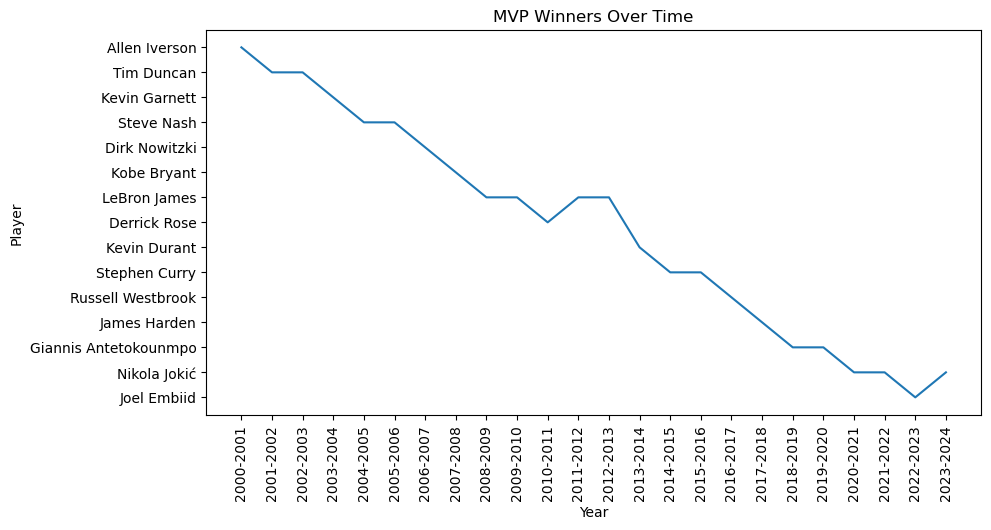

In [452]:
# Plot the trends of MVP winners over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=mvp, x="Year", y="Player") 
plt.xticks(rotation=90)
plt.title("MVP Winners Over Time")
plt.show()


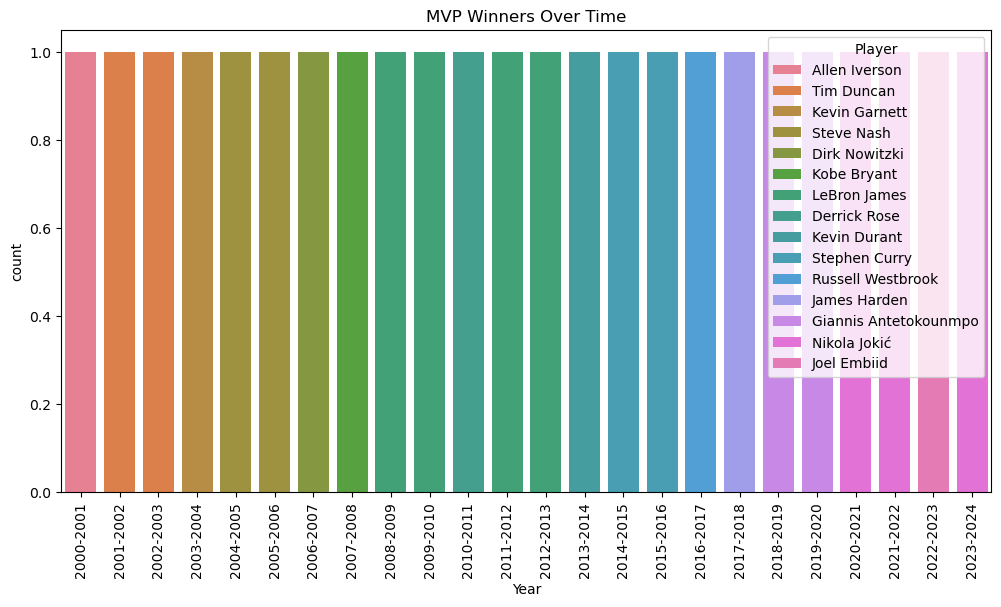

In [453]:
# Plot the trends of MVP winners over time with count
plt.figure(figsize=(12, 6))
sns.countplot(data=mvp, x="Year", hue="Player")
plt.xticks(rotation=90)
plt.title("MVP Winners Over Time")
plt.show()

Early 2000s (2000-2010)
Players like Allen Iverson, Tim Duncan, Kevin Garnett, Steve Nash, and Dirk Nowitzki appear at the top, suggesting their prime years or MVP wins.
Kobe Bryant appears a bit later, reflecting his dominance in the mid-to-late 2000s.
2010s Era Shift (2010-2020)
The transition moves towards LeBron James, Derrick Rose, Kevin Durant, Stephen Curry, Russell Westbrook, and James Harden, which aligns with their MVP and peak performance years.
Modern Era (2020-Present)
The line moves towards Giannis Antetokounmpo, Nikola Jokić, and Joel Embiid, reflecting the dominance of international players in recent years.

Which player has had the most MVP's throughout the years? 

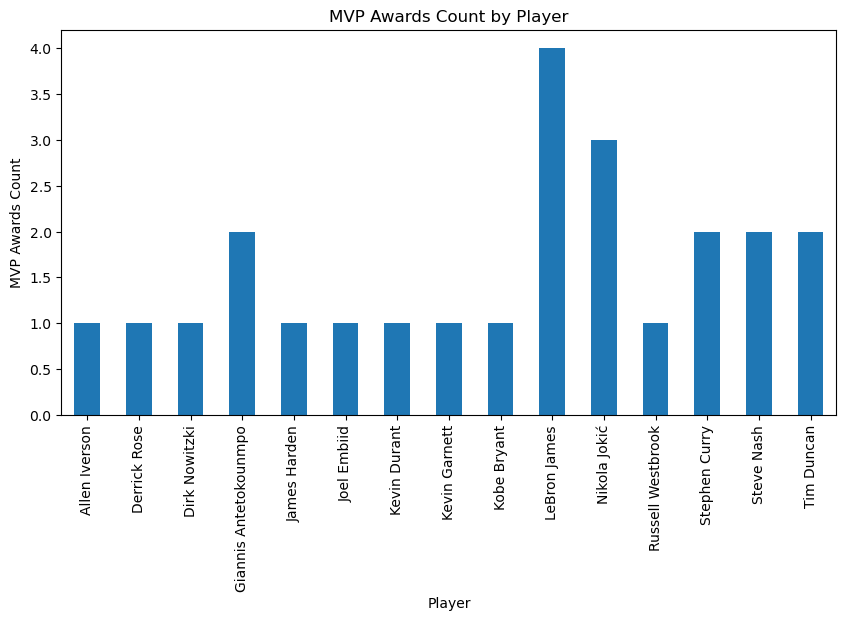

In [454]:
plt.figure(figsize=(10, 5))
mvp_count = mvp.groupby("Player")["Awards"].count().plot.bar()
plt.title('MVP Awards Count by Player')
plt.xlabel('Player')
plt.ylabel('MVP Awards Count')
plt.show()

Which team?

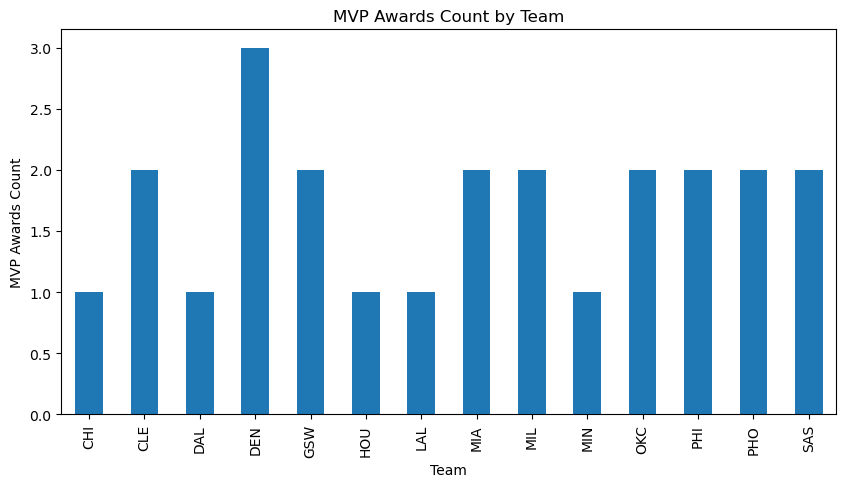

In [455]:
plt.figure(figsize=(10, 5))
mvp_team_count = mvp.groupby("Team")["Awards"].count().plot.bar()
plt.title("MVP Awards Count by Team")
plt.xlabel("Team")
plt.ylabel("MVP Awards Count")
plt.show()


Why has this player made mvp compared to the other 4 players?

In [456]:
top_players = mvp.groupby("Player")["Awards"].count()

top_players

Player
Allen Iverson            1
Derrick Rose             1
Dirk Nowitzki            1
Giannis Antetokounmpo    2
James Harden             1
Joel Embiid              1
Kevin Durant             1
Kevin Garnett            1
Kobe Bryant              1
LeBron James             4
Nikola Jokić             3
Russell Westbrook        1
Stephen Curry            2
Steve Nash               2
Tim Duncan               2
Name: Awards, dtype: int64

In [460]:
mvp = player_df[player_df["Awards"] == "MVP-1"]

mvp

,Year,Player,Team,Pos,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,Awards
5046,2000-2001,Allen Iverson,PHI,SG,71.0,2979.0,2207.0,273.0,325.0,178.0,20.0,0.420,0.320,0.814,MVP-1
6293,2001-2002,Tim Duncan,SAS,PF,82.0,3329.0,2089.0,1042.0,307.0,61.0,203.0,0.508,0.100,0.799,MVP-1
11811,2002-2003,Tim Duncan,SAS,PF,81.0,3181.0,1884.0,1043.0,316.0,55.0,237.0,0.513,0.273,0.710,MVP-1
12869,2003-2004,Kevin Garnett,MIN,PF,82.0,3231.0,1987.0,1139.0,409.0,120.0,178.0,0.499,0.256,0.791,MVP-1
6850,2004-2005,Steve Nash,PHO,PG,75.0,2573.0,1165.0,249.0,861.0,74.0,6.0,0.502,0.431,0.887,MVP-1
8089,2005-2006,Steve Nash,PHO,PG,79.0,2796.0,1489.0,333.0,826.0,61.0,12.0,0.512,0.439,0.921,MVP-1
2471,2006-2007,Dirk Nowitzki,DAL,PF,78.0,2820.0,1916.0,693.0,263.0,52.0,62.0,0.502,0.416,0.904,MVP-1
11210,2007-2008,Kobe Bryant,LAL,SG,82.0,3192.0,2323.0,517.0,441.0,151.0,40.0,0.459,0.361,0.840,MVP-1
553,2008-2009,LeBron James,CLE,SF,81.0,3054.0,2304.0,613.0,587.0,137.0,93.0,0.489,0.344,0.780,MVP-1
14108,2009-2010,LeBron James,CLE,SF,76.0,2966.0,2258.0,554.0,651.0,125.0,77.0,0.503,0.333,0.767,MVP-1


In [467]:
top_players = mvp["Player"].value_counts()

top_players = pd.DataFrame(top_players)

top_players = top_players.reset_index()

top_players

,Player,count
0,LeBron James,4
1,Nikola Jokić,3
2,Tim Duncan,2
3,Steve Nash,2
4,Stephen Curry,2
5,Giannis Antetokounmpo,2
6,Allen Iverson,1
7,Kevin Garnett,1
8,Dirk Nowitzki,1
9,Kobe Bryant,1


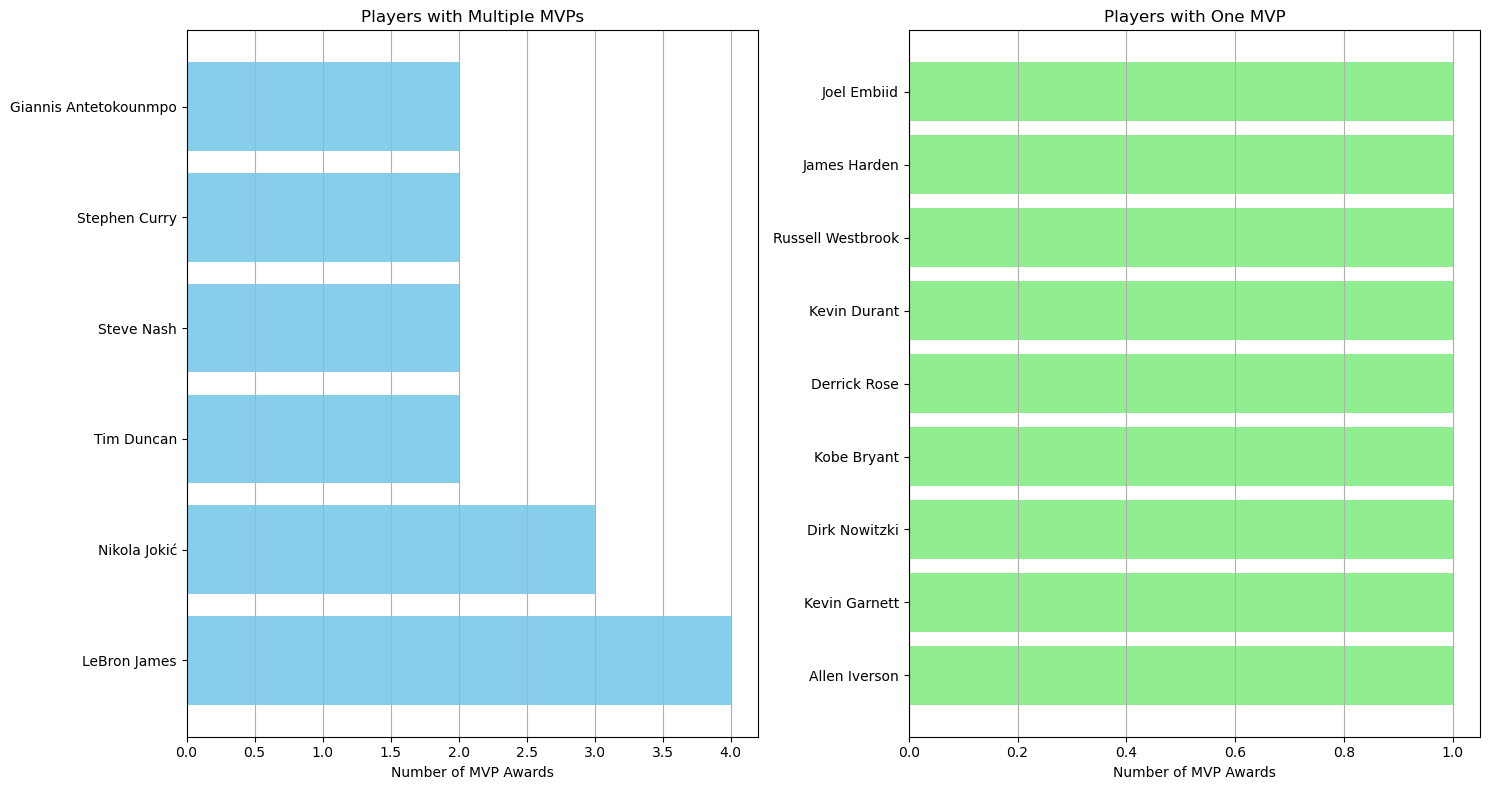

In [469]:
# Split into multiple MVPs vs. one-time MVPs
multiple_mvp = top_players[top_players["count"] > 1]
one_time_mvp = top_players[top_players["count"] == 1]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot multiple MVP winners
ax[0].barh(multiple_mvp["Player"], multiple_mvp["count"], color='skyblue')
ax[0].set_title('Players with Multiple MVPs')
ax[0].set_xlabel('Number of MVP Awards')
ax[0].grid(True, axis='x')

# Plot one-time MVP winners
ax[1].barh(one_time_mvp["Player"], one_time_mvp["count"], color='lightgreen')
ax[1].set_title('Players with One MVP')
ax[1].set_xlabel('Number of MVP Awards')
ax[1].grid(True, axis='x')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Does the MVP winner have a better or worst team?